### データベースからの読み出し

#### Weather Towerの温度・湿度情報

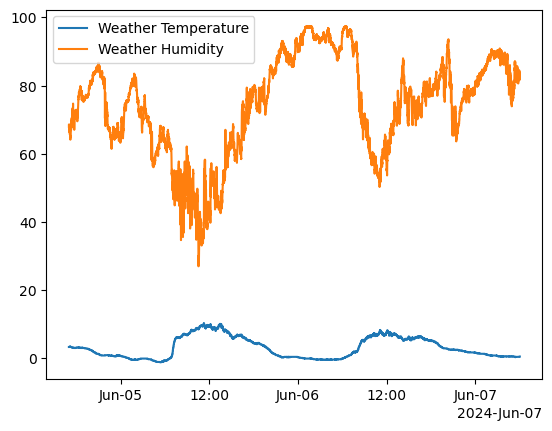

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36591 entries, 0 to 36590
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   #rxdate              36591 non-null  object        
 1   rxtime(HST)          36591 non-null  object        
 2   Weather Temperature  36591 non-null  float64       
 3   Weather Humidity     36591 non-null  float64       
 4   datetime             36591 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.4+ MB
None


In [1]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2024-06-04 17:00:00', 
                                stopDatetime  = '2024-06-07 06:00:00',
                                names = ['Weather Temperature', 'Weather Humidity'])
fetchData.run()
fetchData.draw()

df = fetchData.dataframe
print(df.info())

#### チラーAの冷却水温度

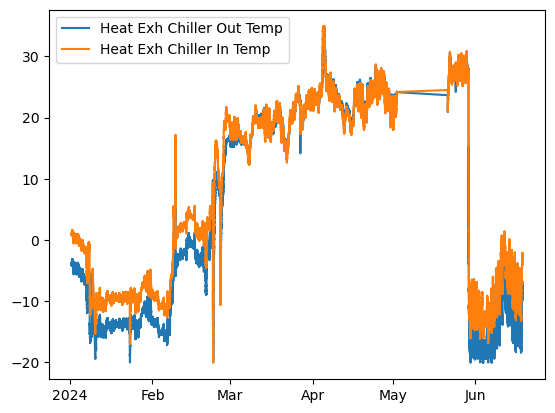

In [2]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2024-01-01 17:00:00', 
                                stopDatetime = '2024-06-20 06:00:00',
                                names = ['Heat Exh Chiller Out Temp','Heat Exh Chiller In Temp'])

fetchData.run()
fetchData.draw()

2024年5月下旬、チラーAの修理が完了した。

#### 制御棟の温度異常

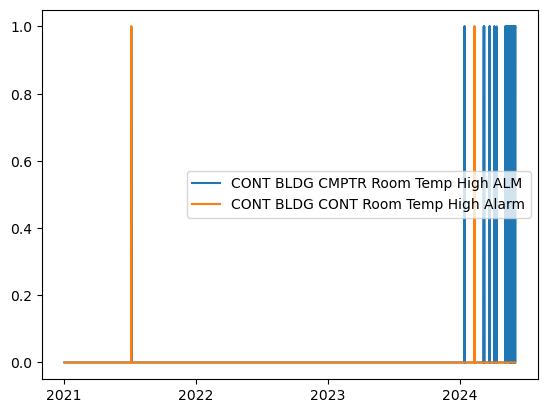

In [13]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ['CONT BLDG CMPTR Room Temp High ALM', 
                                         'CONT BLDG CONT Room Temp High Alarm'])
#                                         'P2012A MCB PAC-4 Unit/Fan Alarm',
#                                         'P2012A MCB PAC-5 Unit/Fan Alarm',
#                                         'P2012A MCB PAC-6 Unit/Fan Alarm'])

fetchData.run()
fetchData.draw()

#### 主鏡固定点の温度センサー読み値 2024/3/23の晩 (課題1:SciOps Night Log - 2024-03-23 で報告されているActuator8-60 Alarmが発生しているときの温度センサのデータを確認し、どのチャンネルが問題かを調べよ)

2024-03-24 05:27:29.4 PMFXS8-60 Temp MON1 Data : 3.2
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON1 Data : 6553.4
2024-03-24 05:27:29.4 PMFXS8-60 Temp MON2 Data : 3.2
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON2 Data : 3.2
2024-03-24 05:27:29.4 PMFXS8-60 Temp MON3 Data : 3.2
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON3 Data : 0.3
2024-03-24 05:27:29.4 PMFXS8-60 Temp MON4 Data : 0.5
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON4 Data : 0.2
2024-03-24 05:27:29.4 PMFXS8-60 Temp MON5 Data : 0.4
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON5 Data : 0.7
2024-03-24 05:26:08.4 PMFXS8-60 Temp MON6 Data : 5.5
2024-03-24 05:26:09.4 PMFXS8-60 Temp MON6 Data : 5.5
2024-03-24 05:27:29.4 PMFXS8-60 Temp MON6 Data : 0.3
2024-03-24 05:27:30.3 PMFXS8-60 Temp MON6 Data : 0.6


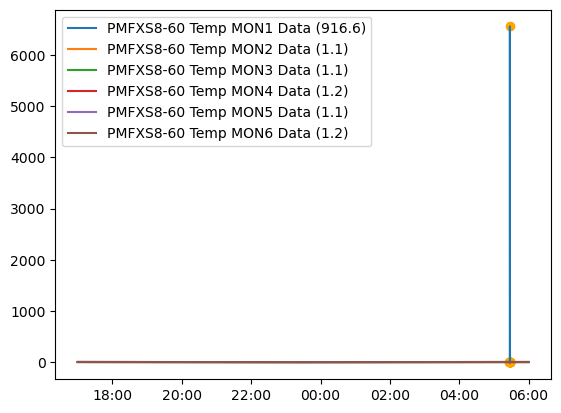

In [1]:
from telDav import FetchData
names = ["PMFXS8-60 Temp MON1 Data", 
         "PMFXS8-60 Temp MON2 Data",
         "PMFXS8-60 Temp MON3 Data",
         "PMFXS8-60 Temp MON4 Data",
         "PMFXS8-60 Temp MON5 Data",
         "PMFXS8-60 Temp MON6 Data"]
fetchData = FetchData.FetchData(startDatetime = '2024-03-23 17:00:00', 
                                stopDatetime =  '2024-03-24 06:00:00',
                                names = names)
fetchData.run()
df = fetchData.dataframe

import pandas as pd
import matplotlib.pyplot as plt
from telDav import findOutliers
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
for name in names:
    ts = pd.Series(df[name].to_numpy(), index=df['datetime'])
    outliers = findOutliers.byPercentile(ts, 0.01)
#    outliers = findOutliers.byMovingMean(ts, 10, 10)
#    outliers = findOutliers.byExponentialSmoothing(ts)
#   outliers = findOutliers.byPctChange(ts, 5)
    ax.plot(df['datetime'], df[name], label=f'{name} ({np.var(df[name]):.1f})')
    ax.scatter(outliers.index, outliers, color='orange')
    for t in outliers.index:
        print(f'{t.strftime("%Y-%m-%d %H:%M:%S.%f")[:21]} {name} : {ts[t]}')
            
plt.legend()
plt.show()

Ch1が5:27AMに異常値を記録している

#### 主鏡固定点温度センサー読み値

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


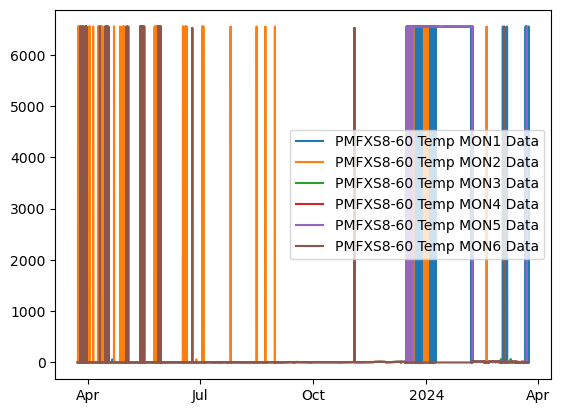

In [9]:
from telDav import FetchData

names = ["PMFXS8-60 Temp MON1 Data", 
         "PMFXS8-60 Temp MON2 Data",
         "PMFXS8-60 Temp MON3 Data",
         "PMFXS8-60 Temp MON4 Data",
         "PMFXS8-60 Temp MON5 Data",
         "PMFXS8-60 Temp MON6 Data"]

fetchData = FetchData.FetchData(startDatetime = '2023-03-23 17:00:00', 
                                stopDatetime =  '2024-03-24 06:00:00',
                                names = names)

fetchData.run()
fetchData.draw()

異常値は、過去1年にも多数発生していた。2023/09以前はCh2の異常が目立っていた。

#### 主鏡修理期間前・中・後の望遠鏡の動き

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


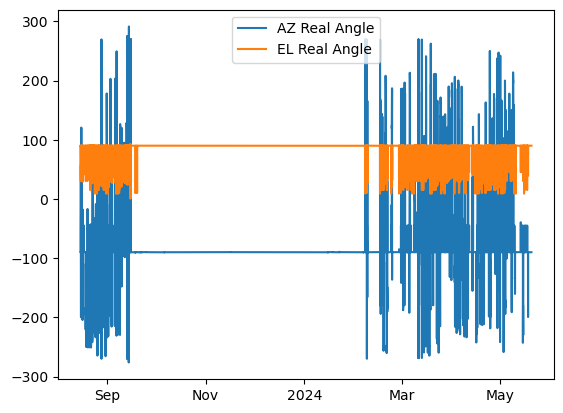

In [33]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2023-08-15 17:00:00', 
                                stopDatetime = '2024-05-20 06:00:00',
                                names = ['AZ Real Angle',
                                         'EL Real Angle'])

fetchData.run()
fetchData.draw()

#### Encoderアラームの発生頻度

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


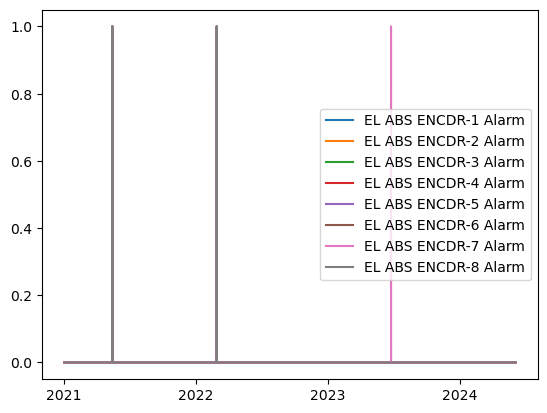

In [27]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ['EL ABS ENCDR-1 Alarm',
                                         'EL ABS ENCDR-2 Alarm',
                                         'EL ABS ENCDR-3 Alarm',
                                         'EL ABS ENCDR-4 Alarm',
                                         'EL ABS ENCDR-5 Alarm',
                                         'EL ABS ENCDR-6 Alarm',
                                         'EL ABS ENCDR-7 Alarm',
                                         'EL ABS ENCDR-8 Alarm'
                                        ])

fetchData.run()
fetchData.draw()

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


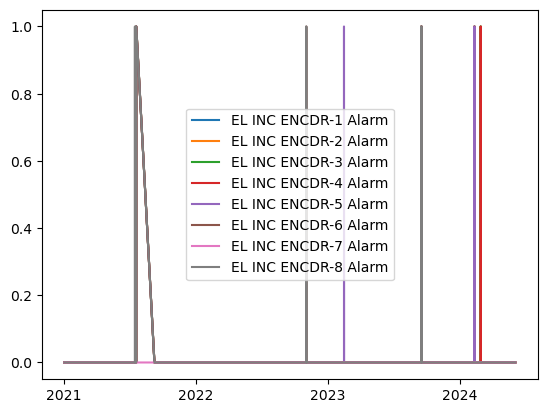

In [28]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ['EL INC ENCDR-1 Alarm',
                                         'EL INC ENCDR-2 Alarm',
                                         'EL INC ENCDR-3 Alarm',
                                         'EL INC ENCDR-4 Alarm',
                                         'EL INC ENCDR-5 Alarm',
                                         'EL INC ENCDR-6 Alarm',
                                         'EL INC ENCDR-7 Alarm',
                                         'EL INC ENCDR-8 Alarm'
                                        ])

fetchData.run()
fetchData.draw()

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


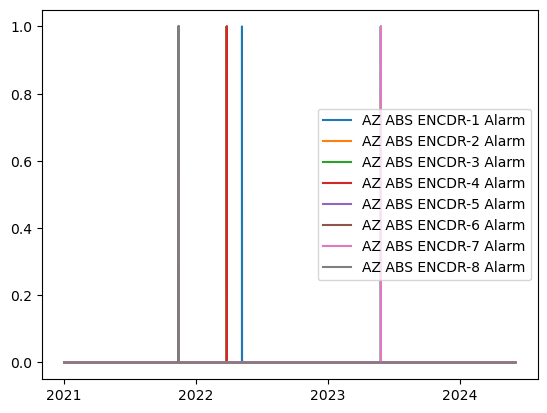

In [29]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ['AZ ABS ENCDR-1 Alarm',
                                         'AZ ABS ENCDR-2 Alarm',
                                         'AZ ABS ENCDR-3 Alarm',
                                         'AZ ABS ENCDR-4 Alarm',
                                         'AZ ABS ENCDR-5 Alarm',
                                         'AZ ABS ENCDR-6 Alarm',
                                         'AZ ABS ENCDR-7 Alarm',
                                         'AZ ABS ENCDR-8 Alarm'
                                        ])

fetchData.run()
fetchData.draw()

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


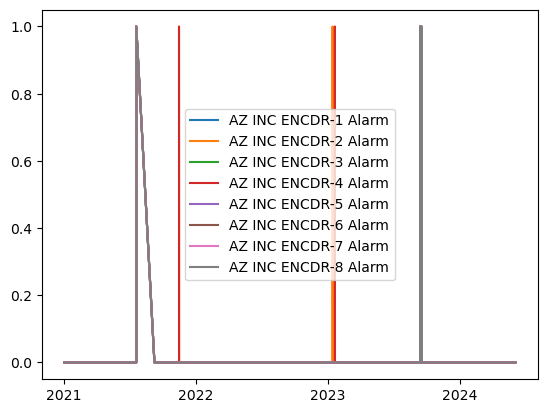

In [30]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ['AZ INC ENCDR-1 Alarm',
                                         'AZ INC ENCDR-2 Alarm',
                                         'AZ INC ENCDR-3 Alarm',
                                         'AZ INC ENCDR-4 Alarm',
                                         'AZ INC ENCDR-5 Alarm',
                                         'AZ INC ENCDR-6 Alarm',
                                         'AZ INC ENCDR-7 Alarm',
                                         'AZ INC ENCDR-8 Alarm'
                                        ])

fetchData.run()
fetchData.draw()

#### DPAアラームの発生頻度

/home/satoshi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


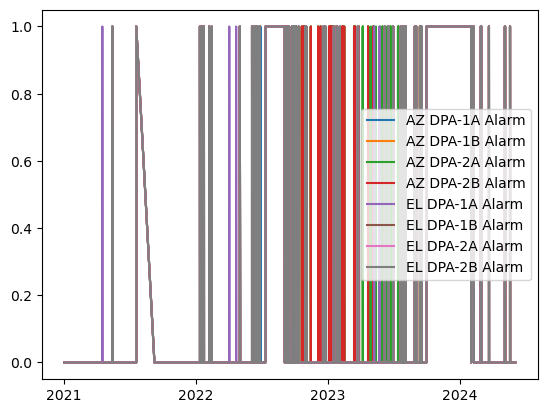

In [34]:
from telDav import FetchData

fetchData = FetchData.FetchData(startDatetime = '2021-01-01 17:00:00', 
                                stopDatetime = '2024-06-01 06:00:00',
                                names = ["AZ DPA-1A Alarm",
                                         "AZ DPA-1B Alarm",
                                         "AZ DPA-2A Alarm",
                                         "AZ DPA-2B Alarm",
                                         "EL DPA-1A Alarm",
                                         "EL DPA-1B Alarm",
                                         "EL DPA-2A Alarm",
                                         "EL DPA-2B Alarm"
                                        ])

fetchData.run()
fetchData.draw()


#### 電力消費の変動

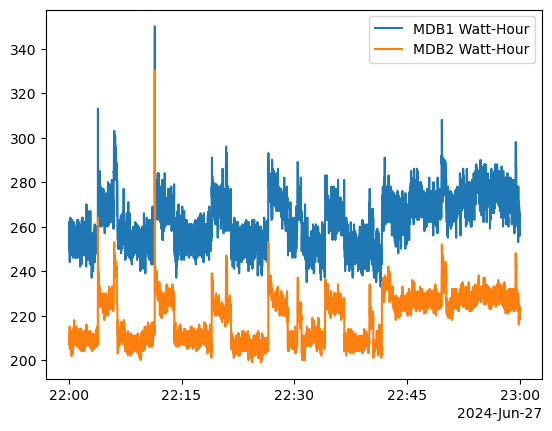

In [1]:
from telDav import FetchData
fetchData = FetchData.FetchData(startDatetime = '2024-06-27 22:00:00', 
                                stopDatetime = '2024-06-27 23:00:00',
                                names = ["MDB1 Watt-Hour", "MDB2 Watt-Hour"])

fetchData.run()
fetchData.draw()

MDB1はMDB2を含む。差分が望遠鏡・ドーム以外の分。

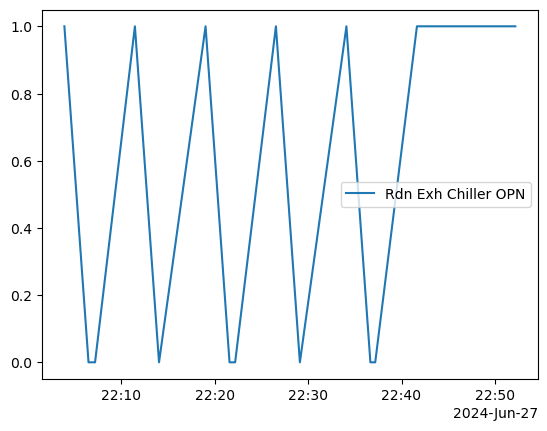

In [2]:
from telDav import FetchData
fetchData = FetchData.FetchData(startDatetime = '2024-06-27 22:00:00', 
                                stopDatetime = '2024-06-27 23:00:00',
                                names = ["Rdn Exh Chiller OPN"])

fetchData.run()
fetchData.draw()

Rdn Exh Chiller OPN (排熱ポンプシステムD冷却ユニット(BR-4)運転中)。 ポンプDはバックアップだが、この日はハイドロベアリングの冷却用に使われていた。20 kW h程度（全体の一割）と大きい使用料である。電源オン時の突入が記録されているときとされていないときがあるが、これはサンプルが１秒間隔と粗いことが原因。

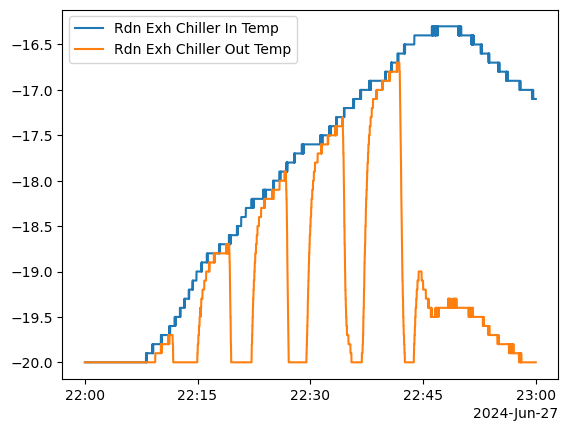

In [3]:
from telDav import FetchData
fetchData = FetchData.FetchData(startDatetime = '2024-06-27 22:00:00', 
                                stopDatetime = '2024-06-27 23:00:00',
                                names = ["Rdn Exh Chiller In Temp", "Rdn Exh Chiller Out Temp"])

fetchData.run()
fetchData.draw()

冷却水の温度変化がナゾ。　何これ？